In [1]:
import pandas as pd 
import numpy as np
import datetime as dt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
from powerbiclient import Report,models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from powerbiclient import Report, models


In [2]:
df=pd.read_csv('C:\\Users\\soura\\Downloads\\archive (1)\\Online-eCommerce.csv')
df

Order_Number State_Code          Customer_Name  Order_Date      Status  \
0         139374.0         AP            Adhir Samal   11/1/2020   Delivered   
1         139375.0         AP         Dannana Jhammi   11/1/2020   Delivered   
2         139376.0         AS            Vipin Kumar   11/1/2020   Delivered   
3         139377.0         BR          Ranjeet Kumar   11/1/2020   Delivered   
4         139378.0         CG          Sajal Singhal   11/1/2020       Order   
...            ...        ...                    ...         ...         ...   
5105      144464.0         TN  Rahul Kumar Prajapati  31/12/2022   Delivered   
5106      144465.0         TR             Sagar Jeur  31/12/2022     Shipped   
5107      144466.0         UK        Rhushikesh Mane  31/12/2022       Order   
5108      144467.0         UP           Ashish Kumar  31/12/2022  Processing   
5109      144468.0         WB           Javed Akhter  31/12/2022   Delivered   

                       Product      Category     Brand     Cost    Sales  \
0                   512 GB M.2           SSD   Samsung   6500.0   8450.0   
1         RYZEN 3rd gen. 3500            CPU     Intel   8500.0  11050.0   
2             2GB Graphic Card  Graphic Card    Nvidia   7000.0   9100.0   
3               16 GB DDR4 RAM           RAM     Hynix   6550.0   8515.0   
4     Standard ATX motherboard   MotherBoard  Gigabyte   7650.0   9945.0   
...                        ...           ...       ...      ...      ...   
5105                406 GB SSD           SSD   Samsung   4500.0   5850.0   
5106        Intel i3 11th gen.           CPU     Intel   8500.0  11050.0   
5107          4GB Graphic card  Graphic Card    Nvidia  12500.0  16250.0   
5108           158 GB DDR4 RAM           RAM     Hynix   3500.0   4550.0   
5109           BTX motherboard   Motherboard  Gigabyte   4500.0   5850.0   

      Quantity  Total_Cost  Total_Sales Assigned Supervisor  
0          1.0      6500.0       8450.0         Ajay Sharma  
1          3.0     25500.0      33150.0        Roshan Kumar  
2          2.0     14000.0      18200.0         Aarvi Gupta  
3          3.0     19650.0      25545.0         Vijay Singh  
4          4.0     30600.0      39780.0          Aadil Khan  
...        ...         ...          ...                 ...  
5105       1.0      4500.0       5850.0         Ajay Sharma  
5106       4.0     34000.0      44200.0        Roshan Kumar  
5107       2.0     25000.0      32500.0         Aarvi Gupta  
5108       2.0      7000.0       9100.0         Vijay Singh  
5109       3.0     13500.0      17550.0          Aadil Khan  

[5110 rows x 14 columns]

# Data Cleaning

In [3]:
df = df.drop_duplicates()

In [4]:
df.isnull().sum()

Order_Number           1
State_Code             1
Customer_Name          1
Order_Date             1
Status                 1
Product                1
Category               1
Brand                  1
Cost                   1
Sales                  1
Quantity               1
Total_Cost             1
Total_Sales            1
Assigned Supervisor    1
dtype: int64

In [5]:
# filling nulll values 
df1=df.fillna(0)

In [6]:
df1

Order_Number State_Code          Customer_Name  Order_Date      Status  \
0         139374.0         AP            Adhir Samal   11/1/2020   Delivered   
1         139375.0         AP         Dannana Jhammi   11/1/2020   Delivered   
2         139376.0         AS            Vipin Kumar   11/1/2020   Delivered   
3         139377.0         BR          Ranjeet Kumar   11/1/2020   Delivered   
4         139378.0         CG          Sajal Singhal   11/1/2020       Order   
...            ...        ...                    ...         ...         ...   
5105      144464.0         TN  Rahul Kumar Prajapati  31/12/2022   Delivered   
5106      144465.0         TR             Sagar Jeur  31/12/2022     Shipped   
5107      144466.0         UK        Rhushikesh Mane  31/12/2022       Order   
5108      144467.0         UP           Ashish Kumar  31/12/2022  Processing   
5109      144468.0         WB           Javed Akhter  31/12/2022   Delivered   

                       Product      Category     Brand     Cost    Sales  \
0                   512 GB M.2           SSD   Samsung   6500.0   8450.0   
1         RYZEN 3rd gen. 3500            CPU     Intel   8500.0  11050.0   
2             2GB Graphic Card  Graphic Card    Nvidia   7000.0   9100.0   
3               16 GB DDR4 RAM           RAM     Hynix   6550.0   8515.0   
4     Standard ATX motherboard   MotherBoard  Gigabyte   7650.0   9945.0   
...                        ...           ...       ...      ...      ...   
5105                406 GB SSD           SSD   Samsung   4500.0   5850.0   
5106        Intel i3 11th gen.           CPU     Intel   8500.0  11050.0   
5107          4GB Graphic card  Graphic Card    Nvidia  12500.0  16250.0   
5108           158 GB DDR4 RAM           RAM     Hynix   3500.0   4550.0   
5109           BTX motherboard   Motherboard  Gigabyte   4500.0   5850.0   

      Quantity  Total_Cost  Total_Sales Assigned Supervisor  
0          1.0      6500.0       8450.0         Ajay Sharma  
1          3.0     25500.0      33150.0        Roshan Kumar  
2          2.0     14000.0      18200.0         Aarvi Gupta  
3          3.0     19650.0      25545.0         Vijay Singh  
4          4.0     30600.0      39780.0          Aadil Khan  
...        ...         ...          ...                 ...  
5105       1.0      4500.0       5850.0         Ajay Sharma  
5106       4.0     34000.0      44200.0        Roshan Kumar  
5107       2.0     25000.0      32500.0         Aarvi Gupta  
5108       2.0      7000.0       9100.0         Vijay Singh  
5109       3.0     13500.0      17550.0          Aadil Khan  

[5096 rows x 14 columns]

In [7]:
df1.isnull().sum()

Order_Number           0
State_Code             0
Customer_Name          0
Order_Date             0
Status                 0
Product                0
Category               0
Brand                  0
Cost                   0
Sales                  0
Quantity               0
Total_Cost             0
Total_Sales            0
Assigned Supervisor    0
dtype: int64

# Total profit

In [8]:
df1['profit']=df1['Total_Sales']-df1['Total_Cost']
profit_df = df1[['profit']].copy()

excel_file_path = "profit.xlsx"

# Save DataFrame to Excel
profit_df.to_excel(excel_file_path)

profit_df

profit
0      1950.0
1      7650.0
2      4200.0
3      5895.0
4      9180.0
...       ...
5105   1350.0
5106  10200.0
5107   7500.0
5108   2100.0
5109   4050.0

[5096 rows x 1 columns]

# Total profit According to state and Year

In [67]:
df['Profit'] = df['Total_Sales'] - df['Total_Cost']

# Step 2: Extract year-month from Order_Date
df['Year_Month'] = pd.to_datetime(df['Order_Date']).dt.to_period('M')

# Step 3: Group by State and Year-Month, and sum the profits
profit_by_state_year_month = df.groupby(['State_Code', 'Year_Month'])['Profit'].sum().reset_index()

# Rename columns for clarity
profit_by_state_year_month.columns = ['State_Code', 'Year_Month', 'Total_Profit']

# Display the result
excel_file_path = "profit_by_state.xlsx"

# Save DataFrame to Excel
profit_by_state_year_month.to_excel(excel_file_path)

profit_by_state_year_month

State_Code Year_Month  Total_Profit
0           AN    2020-01        1035.0
1           AN    2020-02        3000.0
2           AN    2020-03       13422.0
3           AN    2020-05        8400.0
4           AN    2020-06        4350.0
..         ...        ...           ...
973         WB    2022-08        3750.0
974         WB    2022-09        4200.0
975         WB    2022-10       30780.0
976         WB    2022-11       13977.0
977         WB    2022-12       40350.0

[978 rows x 3 columns]

In [10]:
df1
## added profit in data frame according to customer

Order_Number State_Code          Customer_Name  Order_Date      Status  \
0         139374.0         AP            Adhir Samal   11/1/2020   Delivered   
1         139375.0         AP         Dannana Jhammi   11/1/2020   Delivered   
2         139376.0         AS            Vipin Kumar   11/1/2020   Delivered   
3         139377.0         BR          Ranjeet Kumar   11/1/2020   Delivered   
4         139378.0         CG          Sajal Singhal   11/1/2020       Order   
...            ...        ...                    ...         ...         ...   
5105      144464.0         TN  Rahul Kumar Prajapati  31/12/2022   Delivered   
5106      144465.0         TR             Sagar Jeur  31/12/2022     Shipped   
5107      144466.0         UK        Rhushikesh Mane  31/12/2022       Order   
5108      144467.0         UP           Ashish Kumar  31/12/2022  Processing   
5109      144468.0         WB           Javed Akhter  31/12/2022   Delivered   

                       Product      Category     Brand     Cost    Sales  \
0                   512 GB M.2           SSD   Samsung   6500.0   8450.0   
1         RYZEN 3rd gen. 3500            CPU     Intel   8500.0  11050.0   
2             2GB Graphic Card  Graphic Card    Nvidia   7000.0   9100.0   
3               16 GB DDR4 RAM           RAM     Hynix   6550.0   8515.0   
4     Standard ATX motherboard   MotherBoard  Gigabyte   7650.0   9945.0   
...                        ...           ...       ...      ...      ...   
5105                406 GB SSD           SSD   Samsung   4500.0   5850.0   
5106        Intel i3 11th gen.           CPU     Intel   8500.0  11050.0   
5107          4GB Graphic card  Graphic Card    Nvidia  12500.0  16250.0   
5108           158 GB DDR4 RAM           RAM     Hynix   3500.0   4550.0   
5109           BTX motherboard   Motherboard  Gigabyte   4500.0   5850.0   

      Quantity  Total_Cost  Total_Sales Assigned Supervisor   profit  
0          1.0      6500.0       8450.0         Ajay Sharma   1950.0  
1          3.0     25500.0      33150.0        Roshan Kumar   7650.0  
2          2.0     14000.0      18200.0         Aarvi Gupta   4200.0  
3          3.0     19650.0      25545.0         Vijay Singh   5895.0  
4          4.0     30600.0      39780.0          Aadil Khan   9180.0  
...        ...         ...          ...                 ...      ...  
5105       1.0      4500.0       5850.0         Ajay Sharma   1350.0  
5106       4.0     34000.0      44200.0        Roshan Kumar  10200.0  
5107       2.0     25000.0      32500.0         Aarvi Gupta   7500.0  
5108       2.0      7000.0       9100.0         Vijay Singh   2100.0  
5109       3.0     13500.0      17550.0          Aadil Khan   4050.0  

[5096 rows x 15 columns]

In [11]:
# calculated total sales of each customer
customer_sales=df1.groupby('Customer_Name')['Total_Sales'].sum().reset_index()
customer_sales

Customer_Name  Total_Sales
0                         0          0.0
1               Adhir Samal    2751814.0
2            Aditya Agarwal    2598635.0
3                Ajay Mehta       3380.0
4               Ajay Sharma    2551588.0
5            Akhilesh Kumar    1955044.0
6                Amit Singh    2753348.0
7        Aniruddha Kekapure    2091596.0
8              Ashish Kumar    1941225.0
9             Ashish Pandey    2091154.0
10           Ashwini Adsare    2757859.0
11               Aslam Raza    2740777.0
12            Atif Siddiqui    1866852.0
13                 Bijendra    1983254.0
14              Binod Kumar      65260.0
15        Chandrakant Kasbe    1863810.0
16           Dannana Jhammi    2009540.0
17             Dilip Rathod       4368.0
18           Firdoush Jabee    2050178.0
19           Haridas Balraj    1868256.0
20                  Jagdeep    1809847.0
21           Jagjeet Variya      10725.0
22             Javed Akhter    2731963.0
23        Jay Prakash Kumar    2734212.0
24           Jignesh Mhatre    2674087.0
25             Kranti Bheke    2746575.0
26              Kunal Patra    2559635.0
27             Kundan Kumar    2651233.0
28    Mohammed Abdul Kaleem    2640274.0
29          Moinuddin Saifi    1989065.0
30           Prakash Chamka      13650.0
31            Rahul Kashyap    1937780.0
32    Rahul Kumar Prajapati    2974621.0
33            Rajesh Variya    2154984.0
34              Rajiv Singh      13000.0
35      Rakesh Kumar Sharma    2829840.0
36  Ramkrishna Das Adhikary    2775162.0
37            Ranjeet Kumar    1933997.0
38           Ranjeet Mandal    2058264.0
39          Rhushikesh Mane    2595632.0
40               Rohan Kale    2577458.0
41            Roshan Zameer    2074774.0
42               Sagar Jeur    2144701.0
43            Sajal Singhal    2842554.0
44              Shanti Giri       8450.0
45          Sharmili Pandit      44200.0
46         Shivanand Sahani    1947361.0
47        Suvankar Adhikary    2016131.0
48     Suvankar Chakraborty    2629211.0
49              Vijay Mehta       2080.0
50             Vijaya singh       9100.0
51           Vikas Bhalekar       9750.0
52              Vinod Bhave       2990.0
53              Vinod Mehta    2303483.0
54              Vinod Singh       4420.0
55              Vipin Kumar    2865746.0
56             Vishal Singh      33150.0

In [12]:
# segmenting based on this Platinum Customers
# Very Loyal Customers,Recent Customers,Potential Customers,Lost Customers,Losing Customers,Late Bloomer,High Risk Customers,
# Evasive Customers,Becoming Loyal,Almost lost Customers


In [13]:
 df1['Order_Date'].dtype

dtype('O')

In [14]:
df1['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [15]:
date=df1['Order_Date']
excel_file_path = "order_date.xlsx"

# Save DataFrame to Excel
date.to_excel(excel_file_path)

date

0      2020-11-01
1      2020-11-01
2      2020-11-01
3      2020-11-01
4      2020-11-01
          ...    
5105   2022-12-31
5106   2022-12-31
5107   2022-12-31
5108   2022-12-31
5109   2022-12-31
Name: Order_Date, Length: 5096, dtype: datetime64[ns]

In [16]:
df1['Order_Date'].dtype

dtype('<M8[ns]')

In [17]:
max_trans_date = max(df1['Order_Date']).date()
max_trans_date

datetime.date(2022, 12, 31)

In [18]:
comparison_date = pd.to_datetime('2023-1-5')
comparison_date

Timestamp('2023-01-05 00:00:00')

# RFM Analysis

In [19]:
rfm_table =df1.groupby([df1['Customer_Name']]).agg({'Order_Date': lambda date : (comparison_date - date.max()).days,
                                                            'Order_Number' : 'count', 
                                                            'Total_Cost' : sum})
#Order Date -For recency 
#Order_Number-frequency
#Total cost -monetary


In [20]:
rfm_table

Order_Date  Order_Number  Total_Cost
Customer_Name                                                
0                               NaN             1         0.0
Adhir Samal                     5.0           122   2116780.0
Aditya Agarwal                  5.0           121   1998950.0
Ajay Mehta                   1023.0             1      2600.0
Ajay Sharma                     5.0           121   1962760.0
Akhilesh Kumar                  5.0           122   1503880.0
Amit Singh                      5.0           120   2117960.0
Aniruddha Kekapure              5.0           121   1608920.0
Ashish Kumar                    5.0           121   1493250.0
Ashish Pandey                   5.0           120   1608580.0
Ashwini Adsare                  5.0           120   2121430.0
Aslam Raza                      5.0           120   2108290.0
Atif Siddiqui                   5.0           120   1436040.0
Bijendra                        5.0           121   1525580.0
Binod Kumar                  1020.0             1     50200.0
Chandrakant Kasbe               5.0           120   1433700.0
Dannana Jhammi                  5.0           122   1545800.0
Dilip Rathod                 1022.0             1      3360.0
Firdoush Jabee                  5.0           121   1577060.0
Haridas Balraj                  5.0           121   1437120.0
Jagdeep                         5.0           120   1392190.0
Jagjeet Variya               1022.0             1      8250.0
Javed Akhter                    5.0           122   2101510.0
Jay Prakash Kumar               5.0           121   2103240.0
Jignesh Mhatre                  5.0           121   2056990.0
Kranti Bheke                    5.0           121   2112750.0
Kunal Patra                     5.0           120   1968950.0
Kundan Kumar                    5.0           121   2039410.0
Mohammed Abdul Kaleem           5.0           120   2030980.0
Moinuddin Saifi                 5.0           121   1530050.0
Prakash Chamka               1017.0             1     10500.0
Rahul Kashyap                   5.0           120   1490600.0
Rahul Kumar Prajapati           5.0           122   2288170.0
Rajesh Variya                   5.0           120   1657680.0
Rajiv Singh                  1015.0             1     10000.0
Rakesh Kumar Sharma             5.0           120   2176800.0
Ramkrishna Das Adhikary         5.0           121   2134740.0
Ranjeet Kumar                   5.0           121   1487690.0
Ranjeet Mandal                  5.0           121   1583280.0
Rhushikesh Mane                 5.0           122   1996640.0
Rohan Kale                      5.0           121   1982660.0
Roshan Zameer                   5.0           121   1595980.0
Sagar Jeur                      5.0           122   1649770.0
Sajal Singhal                   5.0           122   2186580.0
Shanti Giri                  1017.0             1      6500.0
Sharmili Pandit              1022.0             1     34000.0
Shivanand Sahani                5.0           121   1497970.0
Suvankar Adhikary               5.0           122   1550870.0
Suvankar Chakraborty            5.0           122   2022470.0
Vijay Mehta                  1018.0             1      1600.0
Vijaya singh                 1022.0             1      7000.0
Vikas Bhalekar               1023.0             1      7500.0
Vinod Bhave                  1015.0             1      2300.0
Vinod Mehta                     5.0           121   1771910.0
Vinod Singh                  1023.0             1      3400.0
Vipin Kumar                     5.0           122   2204420.0
Vishal Singh                 1016.0             1     25500.0

In [21]:
# Recency is calculated based on the difference between the most recent order date and the current date.
# Frequency is the count of orders for each customer.
# Monetary is the sum of the 'Total_Cost' for each customer.


In [22]:
rfm_table.columns


Index(['Order_Date', 'Order_Number', 'Total_Cost'], dtype='object')

In [23]:
# replacing the name of columns
rfm_table.rename(columns={'Order_Date':'Recency','Order_Number':'Frequency','Total_Cost':'Monetary'},inplace=True)

In [24]:
rfm_table

Recency  Frequency   Monetary
Customer_Name                                         
0                            NaN          1        0.0
Adhir Samal                  5.0        122  2116780.0
Aditya Agarwal               5.0        121  1998950.0
Ajay Mehta                1023.0          1     2600.0
Ajay Sharma                  5.0        121  1962760.0
Akhilesh Kumar               5.0        122  1503880.0
Amit Singh                   5.0        120  2117960.0
Aniruddha Kekapure           5.0        121  1608920.0
Ashish Kumar                 5.0        121  1493250.0
Ashish Pandey                5.0        120  1608580.0
Ashwini Adsare               5.0        120  2121430.0
Aslam Raza                   5.0        120  2108290.0
Atif Siddiqui                5.0        120  1436040.0
Bijendra                     5.0        121  1525580.0
Binod Kumar               1020.0          1    50200.0
Chandrakant Kasbe            5.0        120  1433700.0
Dannana Jhammi               5.0        122  1545800.0
Dilip Rathod              1022.0          1     3360.0
Firdoush Jabee               5.0        121  1577060.0
Haridas Balraj               5.0        121  1437120.0
Jagdeep                      5.0        120  1392190.0
Jagjeet Variya            1022.0          1     8250.0
Javed Akhter                 5.0        122  2101510.0
Jay Prakash Kumar            5.0        121  2103240.0
Jignesh Mhatre               5.0        121  2056990.0
Kranti Bheke                 5.0        121  2112750.0
Kunal Patra                  5.0        120  1968950.0
Kundan Kumar                 5.0        121  2039410.0
Mohammed Abdul Kaleem        5.0        120  2030980.0
Moinuddin Saifi              5.0        121  1530050.0
Prakash Chamka            1017.0          1    10500.0
Rahul Kashyap                5.0        120  1490600.0
Rahul Kumar Prajapati        5.0        122  2288170.0
Rajesh Variya                5.0        120  1657680.0
Rajiv Singh               1015.0          1    10000.0
Rakesh Kumar Sharma          5.0        120  2176800.0
Ramkrishna Das Adhikary      5.0        121  2134740.0
Ranjeet Kumar                5.0        121  1487690.0
Ranjeet Mandal               5.0        121  1583280.0
Rhushikesh Mane              5.0        122  1996640.0
Rohan Kale                   5.0        121  1982660.0
Roshan Zameer                5.0        121  1595980.0
Sagar Jeur                   5.0        122  1649770.0
Sajal Singhal                5.0        122  2186580.0
Shanti Giri               1017.0          1     6500.0
Sharmili Pandit           1022.0          1    34000.0
Shivanand Sahani             5.0        121  1497970.0
Suvankar Adhikary            5.0        122  1550870.0
Suvankar Chakraborty         5.0        122  2022470.0
Vijay Mehta               1018.0          1     1600.0
Vijaya singh              1022.0          1     7000.0
Vikas Bhalekar            1023.0          1     7500.0
Vinod Bhave               1015.0          1     2300.0
Vinod Mehta                  5.0        121  1771910.0
Vinod Singh               1023.0          1     3400.0
Vipin Kumar                  5.0        122  2204420.0
Vishal Singh              1016.0          1    25500.0

In [69]:
rfm_table.head()

Recency  Frequency   Monetary  R_Quartile  F_Quartile  \
Customer_Name                                                           
0                   NaN          1        0.0           4           4   
Adhir Samal         5.0        122  2116780.0           1           1   
Aditya Agarwal      5.0        121  1998950.0           1           3   
Ajay Mehta       1023.0          1     2600.0           4           4   
Ajay Sharma         5.0        121  1962760.0           1           3   

                M_Quartile  Rfm_score        Customer_Type  
Customer_Name                                               
0                        4        444    Powerful shoppers  
Adhir Samal              1        111      Window shoppers  
Aditya Agarwal           2        132  Occasional shoppers  
Ajay Mehta               4        444    Powerful shoppers  
Ajay Sharma              2        132  Occasional shoppers

In [70]:
aaron = df1[df1['Customer_Name']=='Adhir Samal']
aaron
# just for checking recency wheatheir the calculated data and actual data is correct

Order_Number State_Code Customer_Name Order_Date     Status  \
0         139374.0         AP   Adhir Samal 2020-11-01  Delivered   
47        139416.0         GA   Adhir Samal 2020-03-02    Shipped   
90        139458.0         HR   Adhir Samal 2020-07-03      Order   
133       139500.0         MH   Adhir Samal 2020-03-24  Delivered   
178       139542.0         RJ   Adhir Samal 2020-03-27      Order   
...            ...        ...           ...        ...        ...   
4929      144288.0         DH   Adhir Samal 2022-11-22  Delivered   
4971      144330.0         AP   Adhir Samal 2022-12-17      Order   
5013      144372.0         GA   Adhir Samal 2022-12-27  Delivered   
5055      144414.0         JH   Adhir Samal 2022-12-31      Order   
5097      144456.0         MN   Adhir Samal 2022-12-31  Delivered   

               Product      Category    Brand     Cost    Sales  Quantity  \
0           512 GB M.2           SSD  Samsung   6500.0   8450.0       1.0   
47     15" LCD Dsipaly       Monitor     Dell   7500.0   9750.0       1.0   
90     17" LCD Display       Monitor  Samsung   8250.0  10725.0       2.0   
133         260 GB SSD           SSD  Samsung   4500.0   5850.0       1.0   
178    19" LED Display       Monitor     Dell   9500.0  12350.0       4.0   
...                ...           ...      ...      ...      ...       ...   
4929   26" LCD Display       Monitor     Acer  12550.0  16315.0       1.0   
4971  4GB Graphic card  Graphic Card   Nvidia  12500.0  16250.0       2.0   
5013        659 GB M.2           SSD  Samsung   6500.0   8450.0       3.0   
5055   15" LCD Dsipaly       Monitor     Dell   7500.0   9750.0       2.0   
5097   17" LCD Display       Monitor  Samsung   8250.0  10725.0       4.0   

      Total_Cost  Total_Sales Assigned Supervisor   profit  
0         6500.0       8450.0         Ajay Sharma   1950.0  
47        7500.0       9750.0        Roshan Kumar   2250.0  
90       16500.0      21450.0         Aarvi Gupta   4950.0  
133       4500.0       5850.0         Vijay Singh   1350.0  
178      38000.0      49400.0         Ajay Sharma  11400.0  
...          ...          ...                 ...      ...  
4929     12550.0      16315.0          Aadil Khan   3765.0  
4971     25000.0      32500.0          Aadil Khan   7500.0  
5013     19500.0      25350.0          Aadil Khan   5850.0  
5055     15000.0      19500.0          Aadil Khan   4500.0  
5097     33000.0      42900.0          Aadil Khan   9900.0  

[122 rows x 15 columns]

In [27]:

(comparison_date  - dt.datetime(2022,12,31)).days==5
# so our table of recency is correct

True

In [28]:
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles 

Recency  Frequency   Monetary
0.25      5.0        1.0    50200.0
0.50      5.0      121.0  1577060.0
0.75    257.5      121.0  2030980.0

In [29]:
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 5.0, 0.5: 5.0, 0.75: 257.5},
 'Frequency': {0.25: 1.0, 0.5: 121.0, 0.75: 121.0},
 'Monetary': {0.25: 50200.0, 0.5: 1577060.0, 0.75: 2030980.0}}

In [30]:
rfmSegmentation = rfm_table

In [32]:
#  two classes for the RFM segmentation since, being high recency is bad, while high frequency and monetary value is good.
def Rclass(x,p,d):
    if x<=d[p][0.25]:
        return 1;
    elif  x<=d[p][0.50]:
        return 2;
    elif  x<=d[p][0.75]:
         return 3;
    else:
        return 4

def FMClass(x,p,d):
    if x<=d[p][0.25]:
        return 4;
    elif  x<=d[p][0.50]:
         return 3;
    elif  x<=d[p][0.75]:
         return 2;
    else:
        return 1

In [33]:
rfmSegmentation['R_Quartile']=rfmSegmentation['Recency'].apply(Rclass, args=('Recency',quantiles,))
rfmSegmentation['F_Quartile']=rfmSegmentation['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
rfmSegmentation['M_Quartile']=rfmSegmentation['Monetary'].apply(FMClass, args=('Monetary',quantiles,))

In [34]:
rfmSegmentation['Rfm_score'] = 100*rfmSegmentation['R_Quartile'].astype(int)+10*rfmSegmentation['F_Quartile'].astype(int)+rfmSegmentation['M_Quartile'].astype(int)
#its multiplied by 100,10,1 becouse recency is more important if recency is 1=100 monetary is 1=10 frequency is 1=1 so rfm score wauld be=121

In [35]:
rfmSegmentation

Recency  Frequency   Monetary  R_Quartile  \
Customer_Name                                                        
0                            NaN          1        0.0           4   
Adhir Samal                  5.0        122  2116780.0           1   
Aditya Agarwal               5.0        121  1998950.0           1   
Ajay Mehta                1023.0          1     2600.0           4   
Ajay Sharma                  5.0        121  1962760.0           1   
Akhilesh Kumar               5.0        122  1503880.0           1   
Amit Singh                   5.0        120  2117960.0           1   
Aniruddha Kekapure           5.0        121  1608920.0           1   
Ashish Kumar                 5.0        121  1493250.0           1   
Ashish Pandey                5.0        120  1608580.0           1   
Ashwini Adsare               5.0        120  2121430.0           1   
Aslam Raza                   5.0        120  2108290.0           1   
Atif Siddiqui                5.0        120  1436040.0           1   
Bijendra                     5.0        121  1525580.0           1   
Binod Kumar               1020.0          1    50200.0           4   
Chandrakant Kasbe            5.0        120  1433700.0           1   
Dannana Jhammi               5.0        122  1545800.0           1   
Dilip Rathod              1022.0          1     3360.0           4   
Firdoush Jabee               5.0        121  1577060.0           1   
Haridas Balraj               5.0        121  1437120.0           1   
Jagdeep                      5.0        120  1392190.0           1   
Jagjeet Variya            1022.0          1     8250.0           4   
Javed Akhter                 5.0        122  2101510.0           1   
Jay Prakash Kumar            5.0        121  2103240.0           1   
Jignesh Mhatre               5.0        121  2056990.0           1   
Kranti Bheke                 5.0        121  2112750.0           1   
Kunal Patra                  5.0        120  1968950.0           1   
Kundan Kumar                 5.0        121  2039410.0           1   
Mohammed Abdul Kaleem        5.0        120  2030980.0           1   
Moinuddin Saifi              5.0        121  1530050.0           1   
Prakash Chamka            1017.0          1    10500.0           4   
Rahul Kashyap                5.0        120  1490600.0           1   
Rahul Kumar Prajapati        5.0        122  2288170.0           1   
Rajesh Variya                5.0        120  1657680.0           1   
Rajiv Singh               1015.0          1    10000.0           4   
Rakesh Kumar Sharma          5.0        120  2176800.0           1   
Ramkrishna Das Adhikary      5.0        121  2134740.0           1   
Ranjeet Kumar                5.0        121  1487690.0           1   
Ranjeet Mandal               5.0        121  1583280.0           1   
Rhushikesh Mane              5.0        122  1996640.0           1   
Rohan Kale                   5.0        121  1982660.0           1   
Roshan Zameer                5.0        121  1595980.0           1   
Sagar Jeur                   5.0        122  1649770.0           1   
Sajal Singhal                5.0        122  2186580.0           1   
Shanti Giri               1017.0          1     6500.0           4   
Sharmili Pandit           1022.0          1    34000.0           4   
Shivanand Sahani             5.0        121  1497970.0           1   
Suvankar Adhikary            5.0        122  1550870.0           1   
Suvankar Chakraborty         5.0        122  2022470.0           1   
Vijay Mehta               1018.0          1     1600.0           4   
Vijaya singh              1022.0          1     7000.0           4   
Vikas Bhalekar            1023.0          1     7500.0           4   
Vinod Bhave               1015.0          1     2300.0           4   
Vinod Mehta                  5.0        121  1771910.0           1   
Vinod Singh               1023.0          1     3400.0           4   
Vipin Kumar                  5.0   

In [36]:
rfmSegmentation['Customer_Type']=pd.qcut(rfmSegmentation['Rfm_score'],3,['Window shoppers','Occasional shoppers','Powerful shoppers'])

In [37]:
rfmSegmentation            

Recency  Frequency   Monetary  R_Quartile  \
Customer_Name                                                        
0                            NaN          1        0.0           4   
Adhir Samal                  5.0        122  2116780.0           1   
Aditya Agarwal               5.0        121  1998950.0           1   
Ajay Mehta                1023.0          1     2600.0           4   
Ajay Sharma                  5.0        121  1962760.0           1   
Akhilesh Kumar               5.0        122  1503880.0           1   
Amit Singh                   5.0        120  2117960.0           1   
Aniruddha Kekapure           5.0        121  1608920.0           1   
Ashish Kumar                 5.0        121  1493250.0           1   
Ashish Pandey                5.0        120  1608580.0           1   
Ashwini Adsare               5.0        120  2121430.0           1   
Aslam Raza                   5.0        120  2108290.0           1   
Atif Siddiqui                5.0        120  1436040.0           1   
Bijendra                     5.0        121  1525580.0           1   
Binod Kumar               1020.0          1    50200.0           4   
Chandrakant Kasbe            5.0        120  1433700.0           1   
Dannana Jhammi               5.0        122  1545800.0           1   
Dilip Rathod              1022.0          1     3360.0           4   
Firdoush Jabee               5.0        121  1577060.0           1   
Haridas Balraj               5.0        121  1437120.0           1   
Jagdeep                      5.0        120  1392190.0           1   
Jagjeet Variya            1022.0          1     8250.0           4   
Javed Akhter                 5.0        122  2101510.0           1   
Jay Prakash Kumar            5.0        121  2103240.0           1   
Jignesh Mhatre               5.0        121  2056990.0           1   
Kranti Bheke                 5.0        121  2112750.0           1   
Kunal Patra                  5.0        120  1968950.0           1   
Kundan Kumar                 5.0        121  2039410.0           1   
Mohammed Abdul Kaleem        5.0        120  2030980.0           1   
Moinuddin Saifi              5.0        121  1530050.0           1   
Prakash Chamka            1017.0          1    10500.0           4   
Rahul Kashyap                5.0        120  1490600.0           1   
Rahul Kumar Prajapati        5.0        122  2288170.0           1   
Rajesh Variya                5.0        120  1657680.0           1   
Rajiv Singh               1015.0          1    10000.0           4   
Rakesh Kumar Sharma          5.0        120  2176800.0           1   
Ramkrishna Das Adhikary      5.0        121  2134740.0           1   
Ranjeet Kumar                5.0        121  1487690.0           1   
Ranjeet Mandal               5.0        121  1583280.0           1   
Rhushikesh Mane              5.0        122  1996640.0           1   
Rohan Kale                   5.0        121  1982660.0           1   
Roshan Zameer                5.0        121  1595980.0           1   
Sagar Jeur                   5.0        122  1649770.0           1   
Sajal Singhal                5.0        122  2186580.0           1   
Shanti Giri               1017.0          1     6500.0           4   
Sharmili Pandit           1022.0          1    34000.0           4   
Shivanand Sahani             5.0        121  1497970.0           1   
Suvankar Adhikary            5.0        122  1550870.0           1   
Suvankar Chakraborty         5.0        122  2022470.0           1   
Vijay Mehta               1018.0          1     1600.0           4   
Vijaya singh              1022.0          1     7000.0           4   
Vikas Bhalekar            1023.0          1     7500.0           4   
Vinod Bhave               1015.0          1     2300.0           4   
Vinod Mehta                  5.0        121  1771910.0           1   
Vinod Singh               1023.0          1     3400.0           4   
Vipin Kumar                  5.0   

In [38]:

excel_file_path = 'output.xlsx'
rfmSegmentation.to_excel(excel_file_path, index=False)    # Set index to False if you don't want to include row numbers as a column


# Logistic Regression

In [39]:
rfmSegmentation = rfmSegmentation.dropna()
X = rfmSegmentation.drop(['Customer_Type'],axis=1)
y = rfmSegmentation['Customer_Type']


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [42]:
y_pred = model.predict(X_test)
y_pred


array(['Window shoppers', 'Window shoppers', 'Powerful shoppers',
       'Powerful shoppers', 'Occasional shoppers', 'Powerful shoppers',
       'Occasional shoppers', 'Window shoppers', 'Powerful shoppers',
       'Occasional shoppers', 'Window shoppers', 'Window shoppers'],
      dtype=object)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9166666666666666


# Customer Segmentation

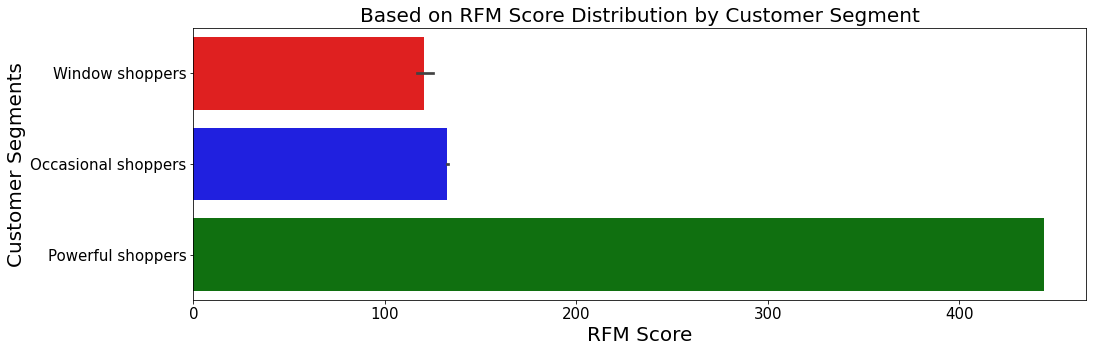

In [44]:

segment_colors = {'Window shoppers': 'red', 'Powerful shoppers': 'green', 'Occasional shoppers': 'blue'}

plt.figure(figsize=(16, 5))
sns.barplot(y='Customer_Type', x='Rfm_score', data=rfmSegmentation, palette=segment_colors)
plt.ylabel('Customer Segments', fontsize=20)
plt.xlabel('RFM Score', fontsize=20)
plt.title('Based on RFM Score Distribution by Customer Segment', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()



# Statewise

In [45]:
state_sales=df.groupby('State_Code')['Sales'].sum()
state_sales_df = state_sales.reset_index(name='Total_Sales')

# Specify the file path
excel_file_path = "state2_sales.xlsx"

# Save DataFrame to Excel
state_sales_df.to_excel(excel_file_path)

state_sales_df

State_Code  Total_Sales
0          AN     178334.0
1          AP     725114.0
2          AR     672750.0
3          AS     673985.0
4          BR    2052921.0
5          CG     669994.0
6          CH     739154.0
7          DD     691041.0
8          DH     681616.0
9          DL    1971801.0
10         GA     656019.0
11         GJ    3783988.0
12         HP     601393.0
13         HR     662415.0
14         JH     691808.0
15         JK     668369.0
16         KA     682500.0
17         KL     641238.0
18         LD     662038.0
19         MH    7136116.0
20         ML     666419.0
21         MN     617838.0
22         MP     713141.0
23         MZ     685906.0
24         NL     728793.0
25         OR     765414.0
26         PB     685672.0
27         PY     677079.0
28         RJ     711555.0
29         SK     743743.0
30         TN    1428297.0
31         TR    1452087.0
32         UK     688272.0
33         UP    3661255.0
34         WB     710905.0

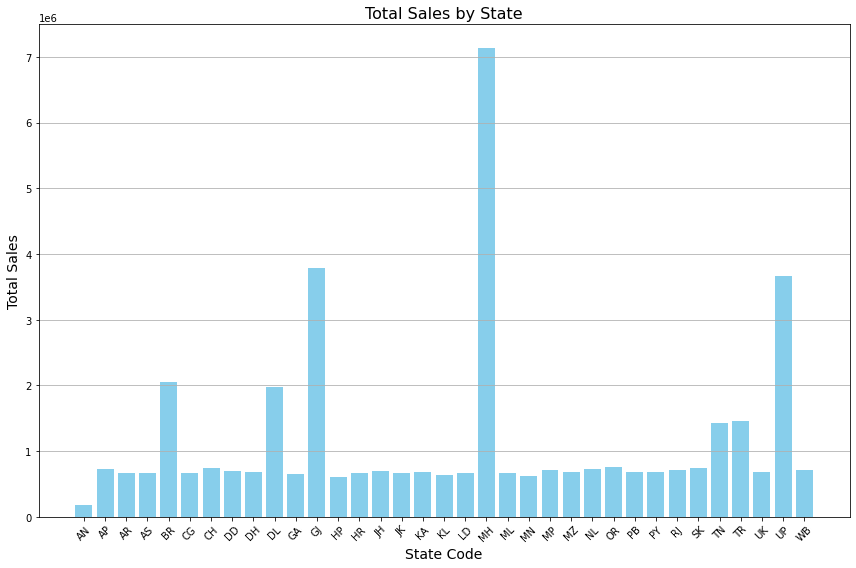

In [46]:
plt.figure(figsize=(12, 8))
plt.bar(state_sales_df['State_Code'], state_sales_df['Total_Sales'], color='skyblue')
plt.title('Total Sales by State', fontsize=16)
plt.xlabel('State Code', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Top 5 selling product of company

In [47]:
product_sales=df.groupby('Product')['Sales'].sum()
product_sales
excel_file_path = "products.xlsx"
product_sales.to_excel(excel_file_path)
product_sales

Product
1 TB SSD                   13650.0
10 Fans Cabinet             2730.0
10 GB DDR4 RAM              7995.0
10 GB DDR4 Ram              2184.0
10 TB HDD                  34450.0
                            ...   
USB Backlight Keyboard    165750.0
USB Keyboard              156000.0
USB Mouse                  67795.0
Wireless Keyboard         222755.0
Wireless Mouse            117000.0
Name: Sales, Length: 1228, dtype: float64

In [48]:
top_5_selling_products = product_sales.nlargest(5)


In [49]:
top_5_selling_products = top_5_selling_products.reset_index()
excel_file_path = "top_Selling_products.xlsx"

# Save DataFrame to Excel
top_5_selling_products.to_excel(excel_file_path)
top_5_selling_products


Product      Sales
0  I7 - intel 12th Generation  2827500.0
1            2GB Graphic Card  2730000.0
2             26" LCD Display  2447250.0
3            4GB Graphic card  2437500.0
4             21" LCD Display  2047500.0

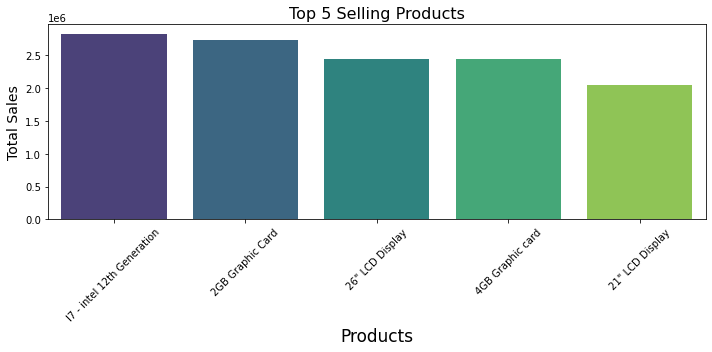

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(x='Product', y='Sales', data=top_5_selling_products, palette='viridis')
plt.title('Top 5 Selling Products', fontsize=16)
plt.xlabel('Products', fontsize=17)
plt.ylabel('Total Sales', fontsize=14)  # Adjust ylabel accordingly if you used 'Sales'
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Top dealers

In [51]:
Top_dealers=df.groupby('Assigned Supervisor')['Sales'].sum()
top_Supervisors=Top_dealers.nlargest(5)
excel_file_path = "top_dealers.xlsx"

# Save DataFrame to Excel
top_Supervisors.to_excel(excel_file_path)
top_Supervisors



Assigned Supervisor
Aarvi Gupta     7657403.0
Ajay Sharma     7474051.0
Aadil Khan      6347822.0
Roshan Kumar    6268184.0
Vijay Singh     6219876.0
Name: Sales, dtype: float64

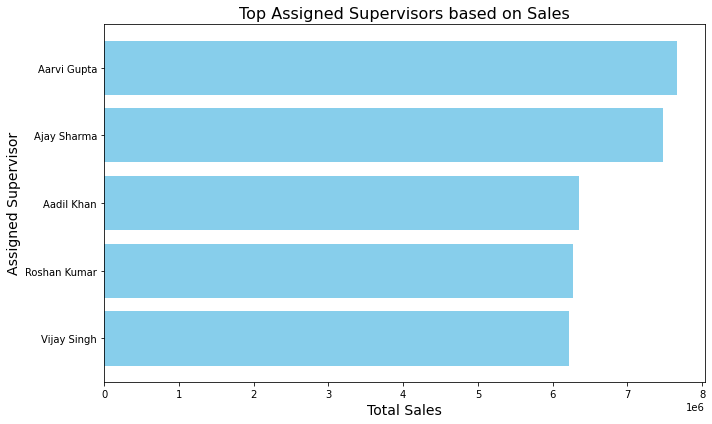

In [52]:
plt.figure(figsize=(10, 6))
plt.barh(top_Supervisors.index, top_Supervisors.values, color='skyblue')
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Assigned Supervisor', fontsize=14)
plt.title('Top Assigned Supervisors based on Sales', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to display the top supervisor at the top
plt.tight_layout()
plt.show()

# Top Selling Brands

In [53]:
Top_brands=df.groupby('Brand')['Sales'].sum()
Top_brands
excel_file_path = "brands.xlsx"
Top_brands.to_excel(excel_file_path)


In [54]:
Top_5_brands=Top_brands.nlargest(5)

excel_file_path = "top_brands.xlsx"

# Save DataFrame to Excel
Top_5_brands.to_excel(excel_file_path)
Top_5_brands


Brand
Intel              7800000.0
Samsung            6629545.0
Dell               5894655.0
Nvidia             5167500.0
Western Digital    3204500.0
Name: Sales, dtype: float64

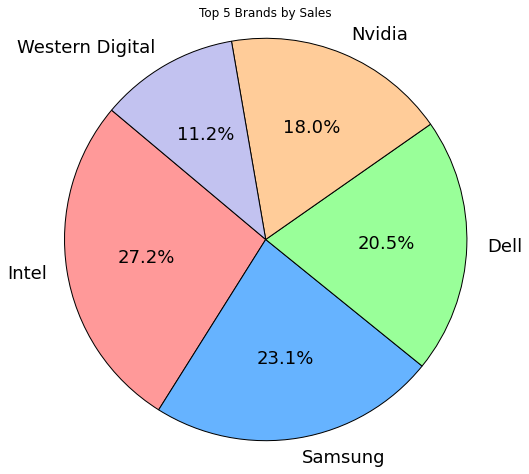

In [55]:
plt.figure(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
plt.pie(Top_5_brands, labels=Top_5_brands.index, autopct='%1.1f%%', startangle=140,textprops={'fontsize': 18},colors=colors,wedgeprops=dict(edgecolor='black'))
plt.title('Top 5 Brands by Sales')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [56]:
# Sales Performance: You can analyze the sales figures to understand the revenue generated by the company over a certain period. This can include overall sales, sales by product, sales by category, etc.

# Profitability: Calculate the profit margins by subtracting the total cost from the total sales. This will help in understanding which products or categories are more profitable.

# Customer Analysis: Analyze customer behavior such as repeat purchases, average order value, and customer demographics. This will help in understanding the most valuable customers and tailoring marketing strategies accordingly.

# Product Performance: Identify the top-selling products and categories to understand customer preferences. This will help in optimizing inventory and marketing efforts.

# Order Fulfillment Efficiency: Analyze the status column to understand the efficiency of order fulfillment processes. This includes order processing time, order cancellation rate, and customer satisfaction.

# Supervisor Performance: Evaluate the performance of assigned supervisors based on metrics such as order volume, sales generated, and customer satisfaction. This can help in identifying areas for improvement and providing targeted training or support.

# Trend Analysis: Analyze sales trends over time to identify seasonal patterns, market trends, and potential areas for growth.



# Order Status


In [57]:
# customer_sales=df1.groupby('Order_Number')['Status'].sum().reset_index()
# customer_sales
total_orders = len(df)
fulfilled_orders = len(df[df['Status'] == 'Delivered'])
fulfillment_rate = (fulfilled_orders / total_orders) * 100


Shipped_orders = len(df[df['Status'] == 'Shipped'])
Shipped_rate = (Shipped_orders / total_orders) * 100

Processing_orders = len(df[df['Status'] == 'Processing'])
Processing_rate = (Processing_orders / total_orders) * 100


data = {
    'Metric': [  'Fulfillment Rate', 'Shipped Rate', 'Processing Rate'],
    'Value': [ fulfillment_rate,  Shipped_rate, Processing_rate]
}
metrics_df = pd.DataFrame(data)

# Specify the file path
excel_file_path = "order_metrics.xlsx"

# Save DataFrame to Excel
metrics_df.to_excel(excel_file_path, index=False)


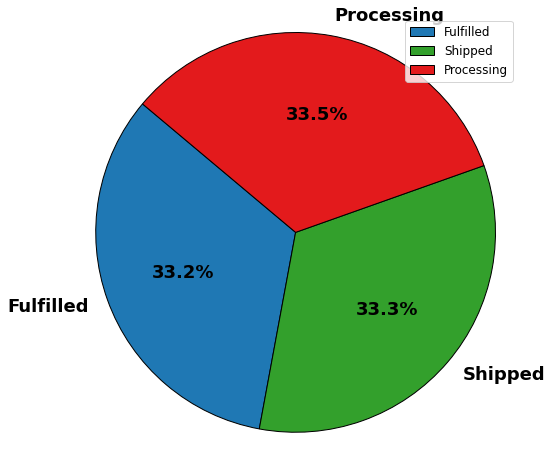

In [58]:
labels = ['Fulfilled', 'Shipped', 'Processing']
sizes = [fulfilled_orders, Shipped_orders, Processing_orders]
colors = ['#1f78b4', '#33a02c', '#e31a1c']  # Dark colors

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors,textprops={'fontsize': 18,'fontweight': 'bold'},wedgeprops=dict(edgecolor='black'))


# Move the legend to the center right
plt.legend( fontsize=12)

# Ensure the pie chart is a circle
plt.axis('equal')

plt.show()


# Sales performance

In [59]:
overall_sales=df['Sales'].sum()

In [60]:
sales_by_product = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)
sales_by_product 

Product
I7 - intel 12th Generation    2827500.0
2GB Graphic Card              2730000.0
26" LCD Display               2447250.0
4GB Graphic card              2437500.0
21" LCD Display               2047500.0
                                ...    
145 GB DDR4 Ram                  2184.0
72 GB DDR4 Ram                   2184.0
146 GB DDR4 Ram                  2184.0
71 GB DDR4 Ram                   2184.0
16 GB DDR4 Ram                   2184.0
Name: Sales, Length: 1228, dtype: float64

In [61]:
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)


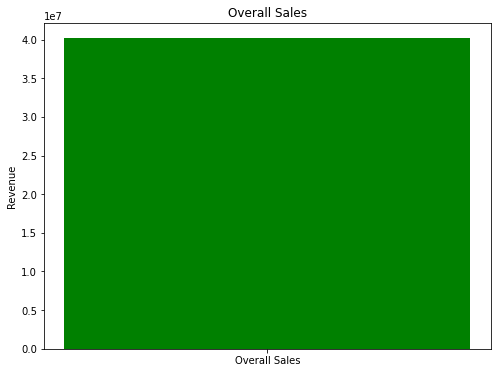

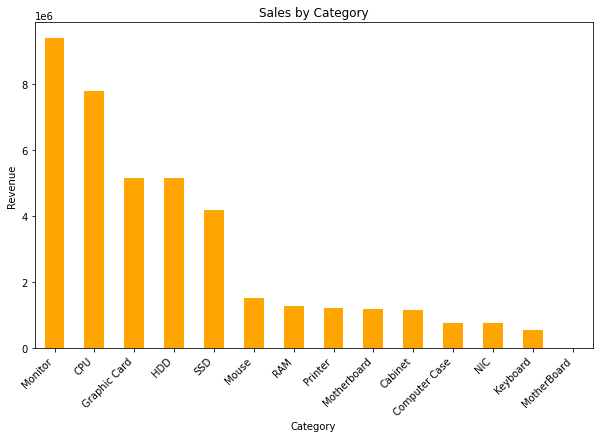

In [62]:
plt.figure(figsize=(8, 6))
plt.bar('Overall Sales', overall_sales, color='green')
plt.ylabel('Revenue')
plt.title('Overall Sales')
plt.show()



# Plotting sales by category
plt.figure(figsize=(10, 6))
sales_by_category.plot(kind='bar', color='orange')
plt.ylabel('Revenue')
plt.title('Sales by Category')
plt.xticks(rotation=45, ha='right')
plt.show()


# Trend Analysis

In [63]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['year']=df['Order_Date'].dt.year
df['month']=df['Order_Date'].dt.month

In [64]:
monthly_sales=df.groupby(['year', 'month'])['Sales'].sum()

excel_file_path = "monthly_sales.xlsx"

# Save DataFrame to Excel
monthly_sales.to_excel(excel_file_path)


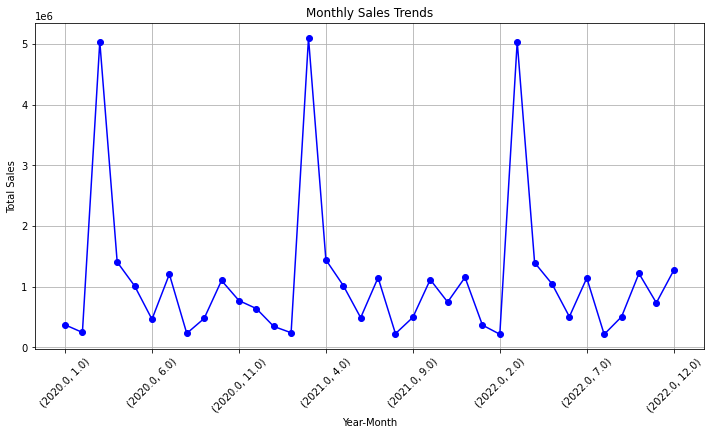

In [65]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o', color='blue')
plt.title('Monthly Sales Trends')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Conclusion

In [66]:
# Powerful Shoppers: Platinum Users are our best users we should give them offer like free delivery as they are our regular customers, we sould retain them at any cost
# Occasional Shoppers: Those are the users who bought from us but are not that frequent, To bring them more we can them offeres like buy 2 get 1 free
# Window Shoppers: Those are who only visit out site to avail some coupon,, We should give them discount coupon so they visit us more

